Ejemplo adicional de Transformación de Fisher

In [ ]:
import numpy as np

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

# Calcular la correlación de Pearson
cor_xy = np.corrcoef(x, y)[0, 1]  # Usa corrcoef de numpy

# Tamaño de la muestra
n = len(x)

# Nivel de confianza (95%)
alpha = 0.05

# Transforma la correlación a la escala z
from scipy.stats import norm  # Importa norm de scipy.stats
z = np.arctanh(cor_xy)  # Usa arctanh de numpy

# Error estándar de z
se_z = 1 / np.sqrt(n - 3)

# Valores críticos de la distribución normal estándar
z_alpha_2 = norm.ppf(1 - alpha/2)  # Usa ppf de norm para la función cuantil

# Límite inferior y superior para z
lower_z = z - z_alpha_2 * se_z
upper_z = z + z_alpha_2 * se_z

# Transformar los límites de vuelta a la escala de la correlación
lower_r = np.tanh(lower_z)  # Usar tanh de numpy
upper_r = np.tanh(upper_z)

# Imprimir el intervalo de confianza
print("Intervalo de confianza al 95% para la correlación:", lower_r, "-", upper_r)


Intervalo de confianza al 95% para la correlación: -0.34008203518751035 - 0.9842357551507267


Grafico de Cajas

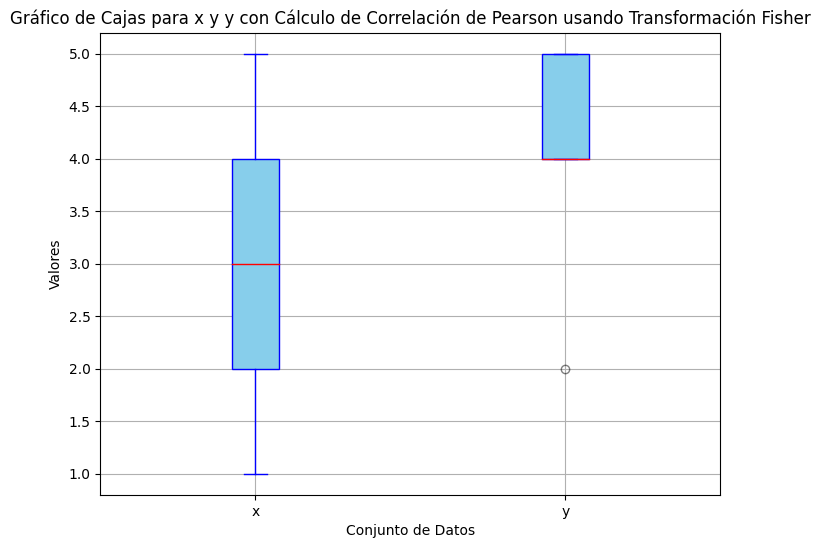

In [2]:
# Crear un gráfico de cajas
data = [x, y]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['x', 'y'], patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.title('Gráfico de Cajas para x y y con Cálculo de Correlación de Pearson usando Transformación Fisher')
plt.xlabel('Conjunto de Datos')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

Explicación del Grafico

**Caja:**

La caja representa la mayor parte de los datos y muestra el **rango intercuartílico (IQR)**, que es la diferencia entre el primer cuartil **(Q1, 25% de los datos)** y el tercer cuartil **(Q3, 75% de los datos)**.
Dentro de la caja, **la línea roja indica la mediana**, que es el valor central de los datos.

**Bigotes:**

Los bigotes se extienden desde los cuartiles hasta los valores máximos y mínimos que no se consideran atípicos. Estos valores están dentro de 1.5 veces el IQR desde los cuartiles.
Los puntos fuera de este rango se consideran valores atípicos y se representan como círculos.